In [24]:
#Matplotlib Challenge

In [25]:
# ANALYSIS

# After analyzing the data, it appears that the most significant drug regimens 
# consisted of Capomulin, Ramicane, Infubinol, and Ceftamin.

# More plots and data analysis were needed to be conducted to give a more in depth report. 
# The analysis was incomplete due to struggles with generating the data need for the remaining plots.

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = 'Resources/Mouse_metadata.csv'
study_results_path = 'Resources/Study_results.csv'

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

complete_data = pd.merge(study_results, mouse_metadata, how='left')

complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
#Mice Number
mouse_count = len(complete_data['Mouse ID'].unique())
mouse_count

249

In [28]:
#Mouse ID and Timepoint Duplicates

id1 = complete_data[['Mouse ID', 'Timepoint']]
id = complete_data[id1.duplicated(keep=False)]
id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
#Dropped Duplicates Dataframe
cleaned_duplicates = complete_data[complete_data['Mouse ID'] != 'g989']
cleaned_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
#Number of mice in the cleaned_duplicates dataframe
no_duplicates_mice_count = len(cleaned_duplicates['Mouse ID'].unique())
no_duplicates_mice_count

248

In [31]:
#SUMMARY STATISTICS 

In [32]:
#Tumor Volume Stats based on Drug Regimen

drug_regimen = complete_data['Drug Regimen'].sort_values().unique()
tumor_vol_mean = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_median = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_variance = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_stddev = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_sem = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


tumor_vol_df = pd.DataFrame({"Drug Regimen": drug_regimen,
                             "Mean Tumor Volume": tumor_vol_mean,
                            "Median Tumor Volume": tumor_vol_median,
                            "Tumor Volume Variance": tumor_vol_variance,
                            "Tumor Volume Std. Dev.": tumor_vol_stddev,
                            "Tumor Volume Std. Err.": tumor_vol_sem})


tumor_vol_df = tumor_vol_df.set_index('Drug Regimen')
tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
drug_count = complete_data['Drug Regimen'].value_counts()

<Axes: >

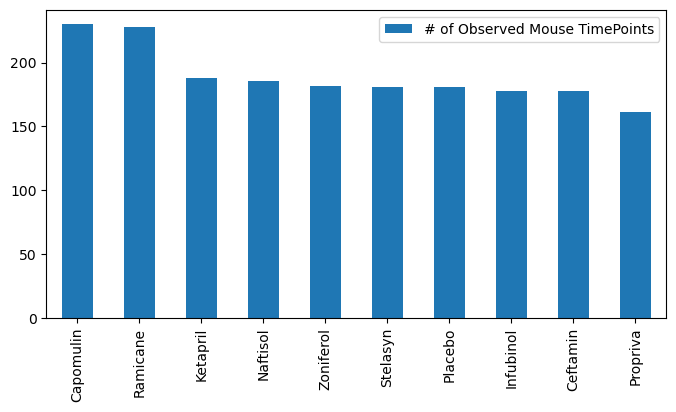

In [34]:
#Bar Plot Using Pandas

bar_plot_pandas = drug_count.to_frame(name='# of Observed Mouse TimePoints')

bar_plot_pandas.plot(kind='bar', figsize=(8,4))


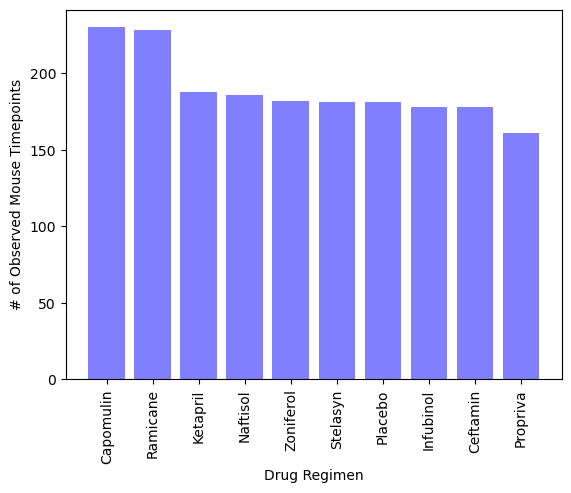

In [35]:
#Bar Plot Using Pyplot
drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
         'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
mouse_points = list(drug_count)  

plt.bar(drugs, mouse_points, color='b', alpha=0.5)

plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [36]:
m_vs_f = complete_data["Sex"].value_counts()

<Axes: ylabel='Sex'>

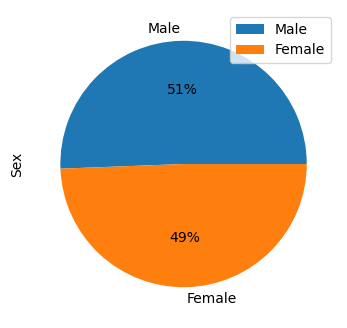

In [37]:
#Pie Plot using Pandas(Distribution of female vs. male mice)
#https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/

male_female = pd.DataFrame({"Sex":[958, 935]},
                           index=['Male', 'Female'])

male_female.plot.pie(figsize=(8,4), y='Sex', autopct='%1.0f%%')

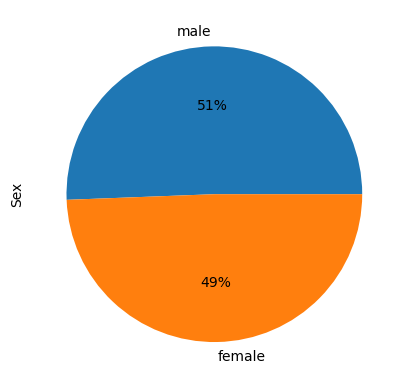

In [38]:
#Pie Plot using Pyplot(Distribution of female vs. male mice)
gender = ["male", "female"]
distribution = [958, 935]

plt.pie(distribution, labels=gender, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

In [39]:
#Quartiles, Outliers, and Boxplots

last_timepoint1 = complete_data.groupby('Drug Regimen')
last_timepoint = last_timepoint1.last()

cleaned_df1 = cleaned_duplicates.groupby('Drug Regimen')
cleaned_df = cleaned_df1.first()

In [40]:
dfs = [cleaned_df, last_timepoint]
merged= pd.concat(dfs)
merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Ceftamin,x822,0,45.000000,0,Male,3,29
Infubinol,c326,0,45.000000,0,Female,18,25
Ketapril,f932,0,45.000000,0,Male,15,29
Naftisol,f993,0,45.000000,0,Male,21,28
Placebo,a897,0,45.000000,0,Male,7,28
Propriva,n630,0,45.000000,0,Female,15,29
Ramicane,c458,0,45.000000,0,Female,23,20
Stelasyn,f234,0,45.000000,0,Male,14,28


In [41]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = [] 


In [18]:
#Line Plot (Tumor Volume vs. Timepoint for a single mouse treated with Capomulin)


In [19]:
#Scatter Plot (Mouse Weight vs. the average observed tumor volume for the entire Capomulin regimen)

In [ ]:
#Correlation Coefficient and Linear Regression Model for Mouse Weight and
#average observed tumor volume for the entire Capomulin regimen



In [ ]:
# I Was Unable to Finish, I struggled to create merged dataframes that would assist in its following plots.
# I plan to resubmit once completed/graded.